In [1]:
import numpy as np
# from utils import visualise
from read_mnist import load_data
import random

y_train,x_train,y_test,x_test=load_data()

print("Train data label dim: {}".format(y_train.shape))
print("Train data features dim: {}".format(x_train.shape))
print("Test data label dim: {}".format(y_test.shape))
print("Test data features dim:{}".format(x_test.shape))

# visualise(x_train)

Train data label dim: (10000,)
Train data features dim: (10000, 784)
Test data label dim: (5000,)
Test data features dim:(5000, 784)


==>>> device is cuda
==>>> total trainning batch number: 79
==>>> total testing batch number: 40
==>>> total number of batches are: 128
==>>> input shape of a batch is: torch.Size([128, 1, 28, 28])
==>>> labels shape of a batch is: torch.Size([128])
NeuralNet(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Sigmoid()
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=10, bias=True)
    (1): Softmax(dim=0)
  )
)
epoch is 0/1000 loss is: 2.303114414215088
epoch is 50/1000 loss is: 2.2976555824279785
epoch is 100/1000 loss is: 2.2790513038635254
epoch is 150/1000 loss is: 2.214959144592285
epoch is 200/1000 loss is: 2.1111319065093994
epoch is 250/1000 loss is: 2.1022939682006836
epoch is 300/1000 loss is: 2.086416721343994
epoch is 350/1000 loss is: 1.9356523752212524
epoch is 400/1000 loss is: 2.072195053100586
epoch is 450/1000 loss is: 1.9827171564102173
epoch is 500/1000 loss is: 1.9084596633911133
epoch is 550/100

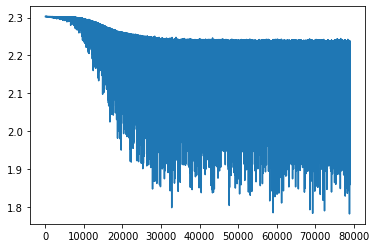

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision import transforms, datasets
from model import NeuralNet
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print("==>>> device is", device)

# Hyper-parameters 
input_size = 784
hidden_size = 256
num_classes = 10
num_epochs = 1000
lr = 0.1
batch_size = 128  

train_set = []
for i in range(x_train.shape[0]):
    train_set.append((  torch.Tensor(x_train[i].reshape(-1, 28, 28)), y_train[i] )) 

test_set = []
for i in range(x_test.shape[0]):
    test_set.append((  torch.Tensor(x_test[i].reshape(-1, 28, 28)), y_test[i] )) 

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)
print("==>>> total trainning batch number: {}".format(len(train_loader)))
print("==>>> total testing batch number: {}".format(len(test_loader)))
print("==>>> total number of batches are: {}".format(batch_size))

for index, batch in enumerate(train_loader):
    inputs = batch[0]
    labels = batch[1]
    if(index == 0):
        print("==>>> input shape of a batch is: {}".format(inputs.shape))
        print("==>>> labels shape of a batch is: {}".format(labels.shape))
        

model = NeuralNet(input_size, hidden_size, num_classes).to(device)
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

num_batches = len(train_loader)
train_loss = []
epoch_counter = []
cnt = 0
for epoch in range(num_epochs):
    for idx, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        # Forward propagation        
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        # backward pass and make step         
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        cnt += 1
        epoch_counter.append(cnt)
    if(epoch%50==0):
        print("epoch is {}/{} loss is: {}".format(epoch, num_epochs, loss.item()))
plt.plot(epoch_counter, train_loss)
torch.save(model.state_dict(), 'model.pth')        
torch.save(model.state_dict(), 'optimizer.pth')    
with torch.no_grad():
    correct = 0
    total = 0
    for idx, (inputs, labels) in enumerate(test_loader):
        inputs = inputs.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        preds = model(inputs)
        values, indices = torch.max(preds, 1)
        total += labels.shape[0] 
        correct += (labels == indices).sum().item()
    print("Accuracy of the network is: {}%".format(100*correct / total) )
